# Tutorial: applying space motion

The `Optics.image` function can handle an observation time. The loci of sources are propagated to the observation epoch, when the proper motions and parallaxes are properly defined. The `Optics.image` function calculates the positional shift due to parallaxes and optical abbretion. This notebook demonstrates the behavior of the function.

In [49]:
import matplotlib.pyplot as plt
import numpy as np

from warpfield.telescope import SourceTable
from warpfield.telescope import get_jasmine

from astropy.coordinates import SkyCoord, Angle
from astropy.table import QTable
from astropy.time import Time
import astropy.units as u


from erfa import ErfaWarning
import warnings
warnings.simplefilter('ignore', category=ErfaWarning)

Here, we define two artificial objects at the location of M1. The parallaxes the objects are 1 arcsec and 1 &mu;as, respectively. The proper motions are $(\mu_{\alpha\star}, \mu_\delta) = (50\,\mathrm{mas/year}, 0\,\mathrm{mas/year})$. The epochs are J2016.0 in the TCB scale, the nominal epoch of the Gaia DR3 catalog.

In [50]:
pointing = SkyCoord.from_name('M2').galactic
position_angle = Angle(0.0 * u.deg)

source = SourceTable(QTable([
    [0, 1],
    [pointing.icrs.ra] * 2,
    [pointing.icrs.dec] * 2,
    [5e3 * u.mas / u.year] * 2,
    [0 * u.mas / u.year] * 2,
    [1e3 * u.mas, 1 * u.uas],
    [2016.0 * u.year] * 2,
], names=[
    'source_id', 'ra', 'dec', 'pmra', 'pmdec', 'parallax', 'ref_epoch'
]))
source.table

<SkyCoord (Galactic): (l, b) in deg
    (53.37088085, -35.76976287)>


source_id,ra,dec,pmra,pmdec,parallax,ref_epoch
,deg,deg,mas / yr,mas / yr,mas,yr
int64,float64,float64,float64,float64,float64,float64
0,323.362583,-0.8232500000000014,5000.0,0.0,1000.0,2016.0
1,323.362583,-0.8232500000000014,5000.0,0.0,0.001,2016.0


The time grid is defined for 3 years. Define a telescope for observation. The telescope is pointed toward M31.

In [51]:
epoch = Time(2016.0, format='decimalyear', scale='tcb')
obstime = epoch + np.linspace(0, 3, 101)*u.year

jasmine = get_jasmine(pointing, position_angle)

Use `apply_space_motion` to propagate the proper motion. Illustrate the motion of the object.

In [52]:
proj = jasmine.optics.projection
posA = QTable(names=['x','y','obstime'])
posB = QTable(names=['x','y','obstime'])

for t in obstime:
    pos = jasmine.optics.imaging(source, epoch=t)
    posA.add_row(pos['x','y','obstime'][0])
    posB.add_row(pos['x','y','obstime'][1])

The following cell illustrates the motion of the first object.

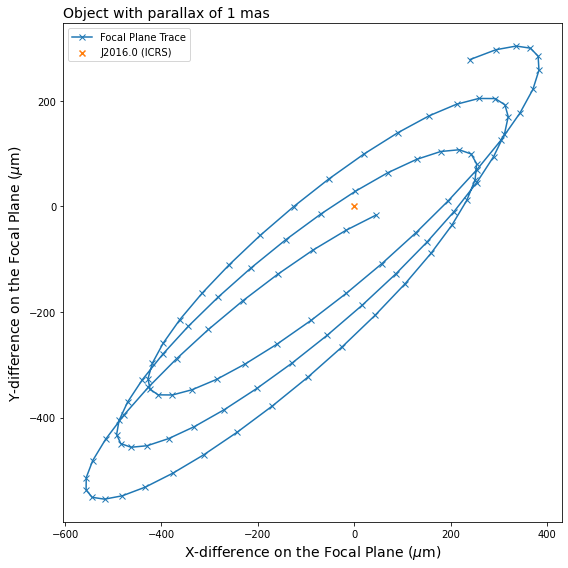

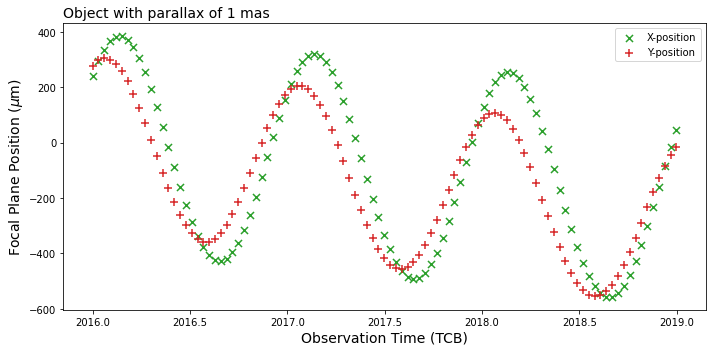

In [82]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.plot(posA['x'], posA['y'],
    color='C0',marker='x', label='Focal Plane Trace')
ax.scatter(0.0, 0.0,
    color='C1', marker='x', label='J2016.0 (ICRS)')

ax.legend(loc='upper left')
ax.set_xlabel('X-difference on the Focal Plane ($\mu$m)', fontsize=14)
ax.set_ylabel('Y-difference on the Focal Plane ($\mu$m)', fontsize=14)
ax.set_title('Object with parallax of 1 mas', loc='left', fontsize=14)
fig.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(10,5))

ax.scatter(posA['obstime'], posA['x'],
    s=50, color='C2', marker='x', label='X-position')
ax.scatter(posA['obstime'], posA['y'],
    s=50, color='C3', marker='+', label='Y-position')

ax.legend(loc='upper right')
ax.set_xlabel('Observation Time (TCB)', fontsize=14)
ax.set_ylabel('Focal Plane Position ($\mu$m)', fontsize=14)
ax.set_title('Object with parallax of 1 mas', loc='left', fontsize=14)
fig.tight_layout()
plt.show()

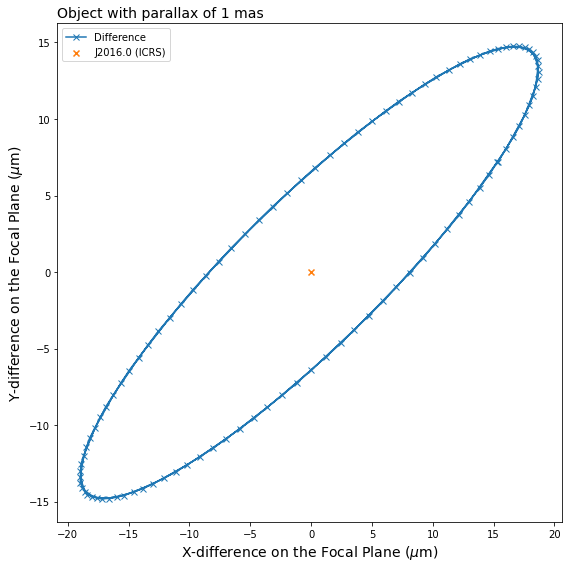

In [81]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.plot(posA['x'] - posB['x'], posA['y'] - posB['y'],
    color='C0',marker='x', label='Difference')
ax.scatter(0.0, 0.0,
    color='C1', marker='x', label='J2016.0 (ICRS)')

ax.legend(loc='upper left')
ax.set_xlabel('X-difference on the Focal Plane ($\mu$m)', fontsize=14)
ax.set_ylabel('Y-difference on the Focal Plane ($\mu$m)', fontsize=14)
ax.set_title('Object with parallax of 1 mas', loc='left', fontsize=14)
fig.tight_layout()
plt.show()